# Projet : choix du pas de temps pour résoudre une équation différentielle  

## Pas fixe

### Codage de la méthode d'Euler explicite

On code ci-dessous la méthode euleur explicite qui renvoie le tableau 'solution' de l'équation différentielle et les temps associés.

In [1]:
import matplotlib.pyplot as plt
from math import exp, cos, sin, log


def solver_euler_explicit(f, X0, dt,t0 = 0, tf = 10):

    x = [X0] #Les tableaux qui vont contenir les valeurs de x en ordonnées et leurs abcisses correspondantes t
    t = [t0]
    j=0

    while t[j] <= tf: 

        x = x + [x[j] + dt*f(x[j], t[j])]
        t = t + [t[j] + dt]
        j = j+1

    return(x,t)

Le solver précédent est essayé ci-dessous avec les fonctiones exponentielle et cosinus dont les équations correspondantes sont respectivement $x'=x$ et $x'(t) = -sin(t)$

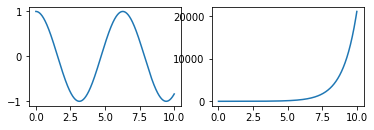

In [3]:
#Exemple de la fonction cosinus et exponentielle 

def f1(x,t):
    return -sin(t)

def f2(x,t):
    return x

x1,t1 = solver_euler_explicit(f1, 1, 0.01)
x2, t2 =solver_euler_explicit(f2, 1, 0.01)


plt.subplot(221)
plt.plot(t1, x1)
plt.subplot(222)
plt.plot(t2, x2)
plt.show()

Dans le cas de la fonction cosinus, on remarque que celle-ci peut également être décrite par l'équation différentielle d'ordre 2 :  $ x'' = -x $

On peut ainsi coder une fonction qui généralise la méthode d'euler aux ordres supérieurs grâce à une fonction vectorielle à la place de scalaire. 
La fonction est implémentée ci-dessous avec en entrée une fonction f qui s'applique à X qui est un vecteur de dimension 2 : $ X = \begin{pmatrix}
x(t)\\
x'(t)\\
\end{pmatrix}$.

Il faut alors 2 scalaires pour l'initialisation.
La courbe orange représente alors bien la fonctions cosinus.

In [4]:
#Plus généralement on peut résoudre des équations d'ordres supérieurs en se ramenant à l'ordre un vectoriellement !

import numpy as np

def solver_euler_explicit_general(f, X0, dt,t0 = 0, tf = 10):

    t = [T0]
    X = [X0]
    x = [X0[0]]
    j = 0

    while t[j] <= tf :

        X = X + [X[j] + dt*f(X[j], t[j])]
        x = x + [X[j+1][0]]
        t = t + [t[j] + dt]
        j = j+1

    return(x,t)

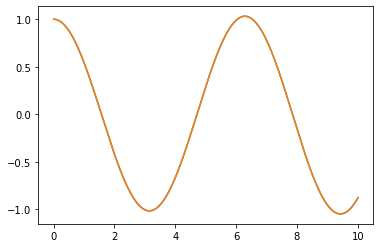

In [9]:
# Affichage de la solution avec euler général, toujours avec cosinus

def f(X,t):
    return(np.array([X[1], -X[0]]))

x,t = solver_euler_explicit_general(f, np.array([1, 0]), 0.01)
plt.plot(t,x)


plt.plot(t,x)
plt.show()

On affiche ci-dessous les valeurs 'connues' des fonctions solutions, on voit que cela correspond à priori aux solutions fournies par le solver. 

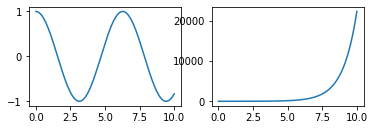

In [6]:
#Comparaison avec la 'vrai' fonction 

def valeurs_fonction(fvrai, dt,t0 = 0, tf = 10) : 
    
    t = [t0]
    j=0

    while t[j] <= tf: 

        t = t + [t[j] + dt]
        j = j+1
    x = [ fvrai(el) for el in t]
    
    return(x,t)

    

x1,t1 = valeurs_fonction(cos, 0.01)
x2, t2 = valeurs_fonction(exp, 0.01)


plt.subplot(221)
plt.plot(t1, x1)
plt.subplot(222)
plt.plot(t2, x2)
plt.show()


### Illustration de la convergence

Pour illustrer l'ordre de convergence de Euler explicite on regarde la valeur du maximum de $\mid x^j - x(t_j) \mid$.

Puis, on prend le logarithme de cette valeur : celui-ci doit être inférieur à $log(c_v) + p\ log(dt)$ où p représente l'ordre de convergence. 

Pour Euler explicite avec l'exemple de cosinus, En affichant le logarithme en fonction du pas de temps ci-dessous, on observe une pente d'environ 1. Cela correspond bien, selon le raisonnement précédent, à une convergence d'ordre 1. 

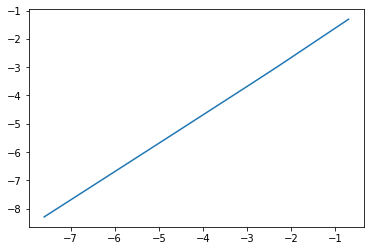

In [15]:
#Illustration de l'ordre de convergence

def illustration(solver, f, X0, fvrai):

    les_dt = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]
    les_max = []

    for dt in les_dt : 

        x_vrai, t = valeurs_fonction(fvrai, dt)
        x_solver = solver(f, X0, dt)[0]

        maximum = max([ abs(i - j) for i,j in zip(x_vrai, x_solver)])

        les_max.append(maximum)
    
    les_max_log = [log(val) for val in les_max]
    les_dt_log = [log(val) for val in les_dt]


    
    plt.plot(les_dt_log,les_max_log)
    plt.show()
    
#Sur l'exemple de cosinus 

def f(x,t):
    return -sin(t)

illustration(solver_euler_explicit, f, 1, cos)

### Cas de la méthode de Heun : schéma convergent d'ordre 2

On code ci-dessous le schéma de Heun et on illustre, de la même manière que précédemment, son fonctionnement et sa convergence.

On voit que cette fois, pour la convergence, on obtient une droite de pente environ égale à 2 ce qui est conforme à une convergence d'ordre 2.



In [9]:
# Implémentation du solver d'ordre 2 de Heun 

def solver_Heun(f, X0, dt,t0 = 0, tf  = 10):

    x = [X0]
    t = [t0]
    j = 0

    while t[j] <= tf: 

        t = t + [t[j] + dt]
        x = x + [x[j] + dt*(f(x[j], t[j]) + f(x[j] + dt*f(x[j], t[j]) , t[j+1]))/2]
        j = j+1

    return(x,t)

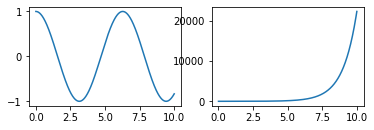

In [36]:
#Exemple de la fonction cosinus et exponentielle 

#Exemple de la fonction cosinus et exponentielle 

def f1(x,t):
    return -sin(t)

def f2(x,t):
    return x

x1,t1 = solver_Heun(f1, 1, 0.01 , tf = 10)
x2, t2 = solver_Heun(f2, 1, 0.01 , tf = 10)


plt.subplot(221)
plt.plot(t1, x1)
plt.subplot(222)
plt.plot(t2, x2)
plt.show()

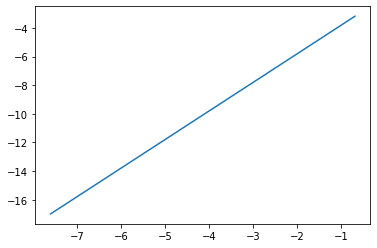

In [17]:
# Illustration de la convergence d'ordre 2 de Heun

illustration(solver_Heun, f, 1, cos)

### Expression de l'erreur locale

On suppose $f$ $C_1$. Montrons que alors $||e^{j+1}|| = \Delta t_j \frac{|| f (t_{j+1}, x^{j+1}) - f(t_j,x^j)||}{2} + O(\Delta t_j ^3)$

En revenant à la définition de $e^{j+1}$, on pose $|| e^{j+1} || = || x^j + \int_{t_j}^{t_{j+1}} f(s, x(s))\, \mathrm ds - x^{j+1} || = || x(t_{j+1}) -x^j - \Delta t_j f (t_j, x^j) ||$ 

En effet, on ne prend que l'erreur locale en compte et on fait comme si $x(t_j)=x^j$.


On peut alors réaliser un développement limité à l'ordre $2$ : 
$$x(t_{j+1}) = x (t_j +\Delta t_j) = x(t_j) + \Delta t_j \dot x (t_j) + \frac{1}{2} \Delta t_j ^2 \ddot x (t_j) + O (\Delta t_j ^2)$$ 
$$ x(t_{j+1}) = x (t_j +\Delta t_j) = x(t_j) + \Delta t_j f(x^j, t_j) + \frac{1}{2} \Delta t_j ^2 (\frac{\partial f}{\partial x}(x^j,t_j)f(x^j,t_j) + \frac{\partial f}{\partial t}(x^j,t_j)) + O (\Delta t_j ^2) $$


D'où $$|| e^{j+1} || = \frac{1}{2} \Delta t_j ^2 ||(\frac{\partial f}{\partial x}(x^j,t_j)f(x^j,t_j) + \frac{\partial f}{\partial t}(x^j,t_j))|| + O (\Delta t_j ^2)\ \ \ (E) $$     

Par ailleurs, avec un DL, on peut exprimer : 

$$ ||f(x^{j+1}, t_{j+1}) -f(x^j, t_j)|| =  || \Delta t_j \frac{\partial f}{\partial t}(x^j,t_j) + \Delta t_j \frac{\partial f}{\partial x}(x^j,t_j)f(x^j,t_j) + O (\Delta t_j ^2)|| $$

Ainsi, on obtient bien : 

$$|| e^{j+1} || =  \frac{1}{2} \Delta t_j ||f(x^{j+1}, t_{j+1}) -f(x^j, t_j)|| + O(\Delta t^3_j)$$



### Adaptation du pas 

L'équation $(E)$ avec la propriété $C^1$ de f permettent d'obtenir que $|| e^{j+1} ||= O(\Delta t_j^2)$

Posons maintenant $A_{j} = \frac{1}{2} ||(\frac{\partial f}{\partial x}(x^j,t_j)f(x^j,t_j) + \frac{\partial f}{\partial t}(x^j,t_j))||$ tel que $||e^{j+1}|| = \Delta t_j^2 A_j$

En faisant un DL à l'ordre 1 sur $A_j$ et $A_{j+1}$, on remarque que  $A_{j+1} = A_j + K  \Delta t_j$ et donc $e^{j+2}=(A_j + K  \Delta t_j) \Delta t_{j+1} ^2 = A_j \Delta t_{j+1}^2 + O(\Delta t^3)$

Or on peut dire que l'erreur au rang $j+2$, $e^{j+2}$ doit au maximum être égale à $Tol_{abs}$. En ne considérant que les termes dominants cela fourni l'équation :

 $e^{j+2} = Tol_abs =  A_j \Delta t_{j+1} ^2$ et en éliminant $A_j$ on obtient : $e^{j+1} \Delta t_{j+1} ^2 = e^{j+2} \Delta t_j ^2$ 
 
 Ainsi, en posant $ \Delta t_{j+1} = \Delta t_{new}$, on obtient bien : $$ \Delta t_{new} = \Delta t \sqrt{\frac{Tol_{abs}}{||e^{j+1}||}}$$




### Explication du solver Euler explicite à pas variable 

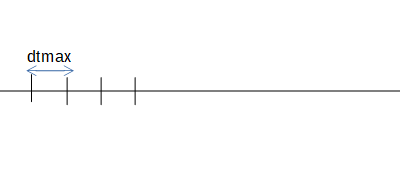

Le code écrit sur git s'explique bien avec un schéma. Globalement, il faut comprendre que l'utilisateur choisit un pas de temps maximal dtmax au delà duquel le pas de temps ne pourra pas aller (Il pourrait correspondre à un pas de temps invariable précédent). Ensuite, au lieu de seulement tracer la fonction "à chaque dtmax" on la trace plus finement à "chaque dt" dans les dtmax et pour suivre où en est le tracé on utilise la variable $t_i$ qui nous dit où on en est dans l'intervalle dtmax.

Expliquons le code : 

Les variables sont d'abord initialisées : le premier pas de temps dt, ti est nul et x ext le x0 initial. 
Ensuite tant que on a pas atteint le temps final, on va tracer la fonction dans chaque intervalle.

On entre dans une boucle : tant que le ti n'est pas égal à dtmax, on adapte le pas de temps avec la méthode décrite précédemment :
ratio_abs_error correspond à ce qui est dans la racine de la dernière formule trouvée et est calculé grâce à la soustraction de x_back et x_nest. Le dernier dt avant le if correspond au $\Delta t_{new}$  (Il y a un facteur de 0.9 en plus dans le code pour prendre une marge sûrement). 
Cependant, l'utilisateur choisis aussi un dtmin en dessous duquel le pas de temps ne peux descendre. Ainsi, si dt est inférieur à dtmin au cours de la boucle une erreur est levée.
Enfin, le dt choisis ne peut être supérieur à la moitié du dtmax choisi. 
A chaque fin de passage on définit ainsi les nouveaux ti, t  et x. (Mais attention on ne les enregistre pas dans le tableau général des x et des t qui sera en sortie !)

Une fois dtmax dépassé on sort alors de la boucle. On cherche alors à se replacer exactement sur le début du nouvel intervalle de largeur dtmax. Pour cela on regarde de combien "dtmax a été dépassé" grâce à la variable dt2DT. 
On donne alors les valeurs de t et x en ce point et on remet ti à 0.

On ajoute enfin les nouveaux x et t au tableau de xs et ts qui contiennent les points.

Lorsque le dernier élément du tableau des t dépasse le temps final choisi on sort de la boucle. 

On a finalement ainsi le tableau des x et des t correspondant à la fonction solution et espacés de tous les dtmax mais calculés de manière plus précise avec l'adaptation du pas de temps.
